# 24.07.19 머신러닝 학습 8회차: K-평균 군집화

## 01 개념

### K-평균 알고리즘

1. 군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘

2. 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트를 선택하는 군집화 기법

3. 더 이상 중심점의 이동이 없을 경우에 반복을 멈춘다.

4. 사이킷런 패키지는 KMeans 클래스를 제공한다.

### 장단점

1. 알고리즘이 쉽고 간결하다.

2. 거리 기반 알고리즘이라 속성의 개수가 매우 많으면 군집화 정확도가 떨어진다.

3. 반복 횟수가 많을 경우 수행 시간이 매우 느려진다.

4. 적절한 군집 수에 대한 가이드가 어렵다.

### KMeans 하이퍼 파라미터

1. labels_: 각 데이터 포인트가 속한 군집 중심점 레이블

2. cluster_centers_: 각 군집 중심점 좌표, 시각화 가능.

## 02 코드 실습

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


3개의 그룹으로 군집화를 실행한다.

In [2]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

lables_속성값을 확인해서 각 데이터가 어떤 중심에 속하는지 알 수 있다.

In [3]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


실제와는 얼마나 차이가 날지 알아본다.

In [7]:
irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


target 2값의 데이터가 분산되어 군집이 이루어졌다. 시각화를 위해 데이터프레임으로 만들자.

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


맷플롯립은 산점도에 서로 다른 마커를 한 번에 표현할 수 없으므로 별도로 생성한다.

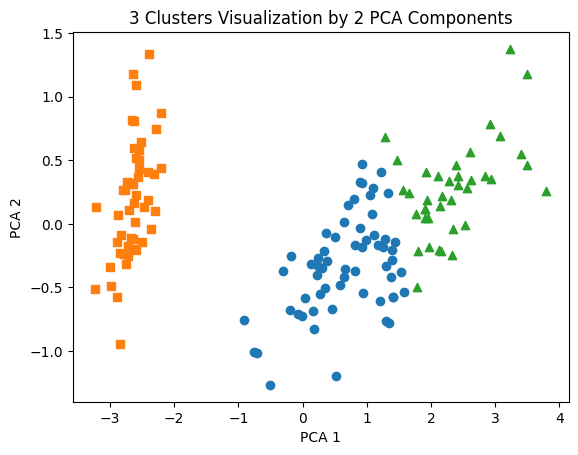

In [12]:
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

클러스터 별 인덱스 번호를 활용해서 pca_x좌표와 pca_y 좌표를 구한 다음, 시각화 했다.

## 03 Cluster Ecaluation

## 04 Mean Shift